In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import pickle
from google.colab import files

This notebook is based on the "Base_model" notebook, and demonstrates how to easily replicate the proccess with refined dataframes

In [ ]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/refined_data_sample_v1.7.csv' #Replace with location of new csv. Make sure to select 'raw' on github to get the correct URL
df = pd.read_csv(url, index_col = 0)

In [ ]:
df

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,...,closest_school_direct,closest_school_loc,closest_college_direct,closest_college_loc,closest_shop_direct,closest_shop_loc,closest_tourism_direct,closest_tourism_loc,closest_leisure_direct,closest_leisure_loc
0,2024-04-10,Condo/Co-op,1024 N Utah St #223,Arlington,VA,22201.0,405000.0,1.0,1.0,WESTVIEW AT BALLSTON METRO,...,0.253084,"(38.8824534, -77.1169694)",0.230396,"(38.8813333, -77.1159137)",0.367360,"(38.8795681, -77.1135125)",0.199054,"(38.8818909, -77.1160371)",0.339469,"(38.8808662, -77.1110978)"
1,2024-03-29,Single Family Residential,4717 26th St N,Arlington,VA,22207.0,1600000.0,3.0,3.0,SHIRLEY WOODS,...,0.190914,"(38.9014367, -77.1263517)",2.584436,"(38.8813333, -77.1159137)",2.850123,"(38.8795681, -77.1135125)",0.133246,"(38.9037726, -77.1277133)",0.800917,"(38.8964621, -77.1231246)"
2,2024-03-14,Condo/Co-op,1029 N Stuart St N #216,Arlington,VA,22201.0,415951.0,1.0,1.0,SUMMERWALK I&II,...,0.314028,"(38.8827171, -77.1079652)",0.425833,"(38.8813333, -77.1159137)",0.414117,"(38.8793938, -77.1118135)",0.386427,"(38.8798673, -77.1131539)",0.238526,"(38.8821034, -77.1091258)"
3,2024-05-02,Condo/Co-op,851 N Glebe Rd #103,Arlington,VA,22203.0,450000.0,1.0,1.0,CONTINENTAL,...,0.242426,"(38.8809869, -77.1173397)",0.117612,"(38.8813333, -77.1159137)",0.207693,"(38.8795681, -77.1135125)",0.146494,"(38.8818909, -77.1160371)",0.290337,"(38.88051, -77.1113422)"
4,2024-05-03,Single Family Residential,4224 23rd St N,Arlington,VA,22207.0,2100000.0,5.0,4.5,LORCOM GROVE,...,0.830182,"(38.8975801, -77.1221561)",2.163361,"(38.8813333, -77.1159137)",2.349002,"(38.8795681, -77.1135125)",1.220543,"(38.905102, -77.1263536)",0.582156,"(38.8988637, -77.1071333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2024-05-31,Townhouse,1250 Delafield Pl NE,Washington,DC,20017.0,540000.0,3.0,2.0,Riggs Park,...,0.449805,"(38.9484573, -76.9931853)",4.069364,"(38.9216189, -77.0185097)",3.311430,"(38.9201356, -76.9936848)",0.712616,"(38.9432546, -76.9892724)",0.846730,"(38.9439152, -76.9947008)"
2423,2024-03-13,Townhouse,1271 Delafield Pl NE,Washington,DC,20017.0,640000.0,3.0,2.5,Riggs Park,...,0.536321,"(38.9484573, -76.9931853)",4.102684,"(38.9216189, -77.0185097)",3.286907,"(38.9201356, -76.9936848)",0.692744,"(38.9432546, -76.9892724)",0.887103,"(38.9439152, -76.9947008)"
2425,2024-05-01,Townhouse,1237 Emerson St NE,Washington,DC,20017.0,680000.0,3.0,3.5,Riggs Park,...,0.481157,"(38.9484573, -76.9931853)",4.121104,"(38.9216189, -77.0185097)",3.369174,"(38.9201356, -76.9936848)",0.770307,"(38.9432546, -76.9892724)",0.898110,"(38.9439152, -76.9947008)"
2426,2024-04-16,Single Family Residential,1704 Michigan Ave NE,Washington,DC,20017.0,799900.0,3.0,2.5,Michigan Park,...,0.112502,"(38.9438, -76.9791)",4.109491,"(38.9216189, -77.0185097)",2.859285,"(38.9201356, -76.9936848)",0.769501,"(38.9432546, -76.9892724)",0.970896,"(38.9352698, -76.9773693)"


First we OHE the property type column

In [ ]:
df = pd.get_dummies(df, columns=['PROPERTY TYPE'], dtype = int)
df

,SOLD DATE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,closest_college_loc,closest_shop_direct,closest_shop_loc,closest_tourism_direct,closest_tourism_loc,closest_leisure_direct,closest_leisure_loc,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,2024-04-10,1024 N Utah St #223,Arlington,VA,22201.0,405000.0,1.0,1.0,WESTVIEW AT BALLSTON METRO,698.0,...,"(38.8813333, -77.1159137)",0.367360,"(38.8795681, -77.1135125)",0.199054,"(38.8818909, -77.1160371)",0.339469,"(38.8808662, -77.1110978)",1,0,0
1,2024-03-29,4717 26th St N,Arlington,VA,22207.0,1600000.0,3.0,3.0,SHIRLEY WOODS,3812.0,...,"(38.8813333, -77.1159137)",2.850123,"(38.8795681, -77.1135125)",0.133246,"(38.9037726, -77.1277133)",0.800917,"(38.8964621, -77.1231246)",0,1,0
2,2024-03-14,1029 N Stuart St N #216,Arlington,VA,22201.0,415951.0,1.0,1.0,SUMMERWALK I&II,714.0,...,"(38.8813333, -77.1159137)",0.414117,"(38.8793938, -77.1118135)",0.386427,"(38.8798673, -77.1131539)",0.238526,"(38.8821034, -77.1091258)",1,0,0
3,2024-05-02,851 N Glebe Rd #103,Arlington,VA,22203.0,450000.0,1.0,1.0,CONTINENTAL,752.0,...,"(38.8813333, -77.1159137)",0.207693,"(38.8795681, -77.1135125)",0.146494,"(38.8818909, -77.1160371)",0.290337,"(38.88051, -77.1113422)",1,0,0
4,2024-05-03,4224 23rd St N,Arlington,VA,22207.0,2100000.0,5.0,4.5,LORCOM GROVE,5694.0,...,"(38.8813333, -77.1159137)",2.349002,"(38.8795681, -77.1135125)",1.220543,"(38.905102, -77.1263536)",0.582156,"(38.8988637, -77.1071333)",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2024-05-31,1250 Delafield Pl NE,Washington,DC,20017.0,540000.0,3.0,2.0,Riggs Park,1543.0,...,"(38.9216189, -77.0185097)",3.311430,"(38.9201356, -76.9936848)",0.712616,"(38.9432546, -76.9892724)",0.846730,"(38.9439152, -76.9947008)",0,0,1
2423,2024-03-13,1271 Delafield Pl NE,Washington,DC,20017.0,640000.0,3.0,2.5,Riggs Park,1861.0,...,"(38.9216189, -77.0185097)",3.286907,"(38.9201356, -76.9936848)",0.692744,"(38.9432546, -76.9892724)",0.887103,"(38.9439152, -76.9947008)",0,0,1
2425,2024-05-01,1237 Emerson St NE,Washington,DC,20017.0,680000.0,3.0,3.5,Riggs Park,1632.0,...,"(38.9216189, -77.0185097)",3.369174,"(38.9201356, -76.9936848)",0.770307,"(38.9432546, -76.9892724)",0.898110,"(38.9439152, -76.9947008)",0,0,1
2426,2024-04-16,1704 Michigan Ave NE,Washington,DC,20017.0,799900.0,3.0,2.5,Michigan Park,2139.0,...,"(38.9216189, -77.0185097)",2.859285,"(38.9201356, -76.9936848)",0.769501,"(38.9432546, -76.9892724)",0.970896,"(38.9352698, -76.9773693)",0,1,0


Next we import the encoded_df and add the column for target encoding with the threshold of 50 (see Exploring Location Options and Base_model notebooks)

In [ ]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/encoded_df.csv'
encoded_df = pd.read_csv(url, index_col = 0)

In [ ]:
df['TARGET_ENCODED_PRICE_50'] = encoded_df['TARGET_ENCODED_PRICE_50']

We end up needing a dictionary for location : target encoded price for model deployment

In [ ]:
location_to_price_dict = dict(zip(df['LOCATION'], df['TARGET_ENCODED_PRICE_50']))

In [ ]:
with open('location_to_price_dict.pkl', 'wb') as file:
    pickle.dump(location_to_price_dict, file)
files.download('location_to_price_dict.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns.to_list()

['SOLD DATE',
 'ADDRESS',
 'CITY',
 'STATE OR PROVINCE',
 'ZIP OR POSTAL CODE',
 'PRICE',
 'BEDS',
 'BATHS',
 'LOCATION',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 'HOA/MONTH',
 'LATITUDE',
 'LONGITUDE',
 'closest_greenspace_direct',
 'closest_greenspace_coords',
 'closest_greenspace_centercoord',
 'closest_greenspace_area',
 'all_greenspace_area_under1km',
 'closest_metro_direct',
 'closest_metro_loc',
 'closest_school_direct',
 'closest_school_loc',
 'closest_college_direct',
 'closest_college_loc',
 'closest_shop_direct',
 'closest_shop_loc',
 'closest_tourism_direct',
 'closest_tourism_loc',
 'closest_leisure_direct',
 'closest_leisure_loc',
 'PROPERTY TYPE_Condo/Co-op',
 'PROPERTY TYPE_Single Family Residential',
 'PROPERTY TYPE_Townhouse',
 'TARGET_ENCODED_PRICE_50']

In [ ]:
dropped = ['SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'closest_greenspace_coords', 'closest_greenspace_centercoord', 'closest_metro_loc',
           'closest_metro_loc', 'closest_school_loc', 'closest_college_loc', 'closest_shop_loc', 'closest_tourism_loc', 'closest_leisure_loc'] #EDIT THIS TO DROP MORE IF NECESSARY
df = df.drop(columns = dropped)

In [ ]:
df

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,closest_greenspace_direct,closest_greenspace_area,all_greenspace_area_under1km,closest_metro_direct,closest_school_direct,closest_college_direct,closest_shop_direct,closest_tourism_direct,closest_leisure_direct,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,TARGET_ENCODED_PRICE_50
0,405000.0,1.0,1.0,698.0,NaN,2005.0,522.0,0.122773,2778.829717,218198.510995,0.177483,0.253084,0.230396,0.367360,0.199054,0.339469,1,0,0,7.929219e+05
1,1600000.0,3.0,3.0,3812.0,17424.0,1937.0,0.0,0.290724,305.313007,105694.014358,2.634139,0.190914,2.584436,2.850123,0.133246,0.800917,0,1,0,1.535608e+06
2,415951.0,1.0,1.0,714.0,NaN,1985.0,407.0,0.042834,2778.829717,186993.310039,0.095504,0.314028,0.425833,0.414117,0.386427,0.238526,1,0,0,7.929219e+05
3,450000.0,1.0,1.0,752.0,NaN,2003.0,419.0,0.136345,241.772309,330891.596563,0.243092,0.242426,0.117612,0.207693,0.146494,0.290337,1,0,0,6.814341e+05
4,2100000.0,5.0,4.5,5694.0,6686.0,2007.0,0.0,0.030358,14014.192197,387061.107021,2.040113,0.830182,2.163361,2.349002,1.220543,0.582156,0,1,0,1.535608e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,540000.0,3.0,2.0,1543.0,2970.0,1948.0,0.0,0.262093,364.358400,474113.695365,1.247862,0.449805,4.069364,3.311430,0.712616,0.846730,0,0,1,6.797057e+05
2423,640000.0,3.0,2.5,1861.0,2361.0,1951.0,0.0,0.252830,460179.863106,474113.695365,1.352463,0.536321,4.102684,3.286907,0.692744,0.887103,0,0,1,6.797057e+05
2425,680000.0,3.0,3.5,1632.0,2125.0,1950.0,0.0,0.217331,460179.863106,474113.695365,1.249634,0.481157,4.121104,3.369174,0.770307,0.898110,0,0,1,6.797057e+05
2426,799900.0,3.0,2.5,2139.0,3900.0,1948.0,0.0,0.092021,8859.530138,656116.422721,1.638526,0.112502,4.109491,2.859285,0.769501,0.970896,0,1,0,6.797057e+05


In [ ]:
df = df.fillna(0)

Let's look at a coorelation heat map before doing anything else

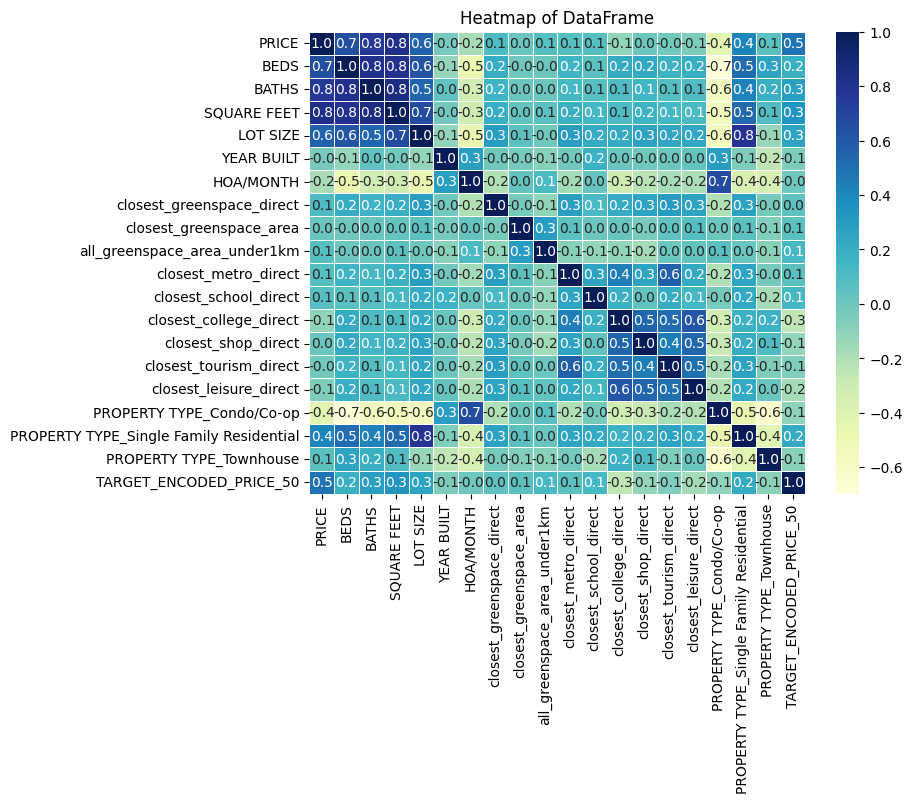

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Heatmap of DataFrame')
plt.show()

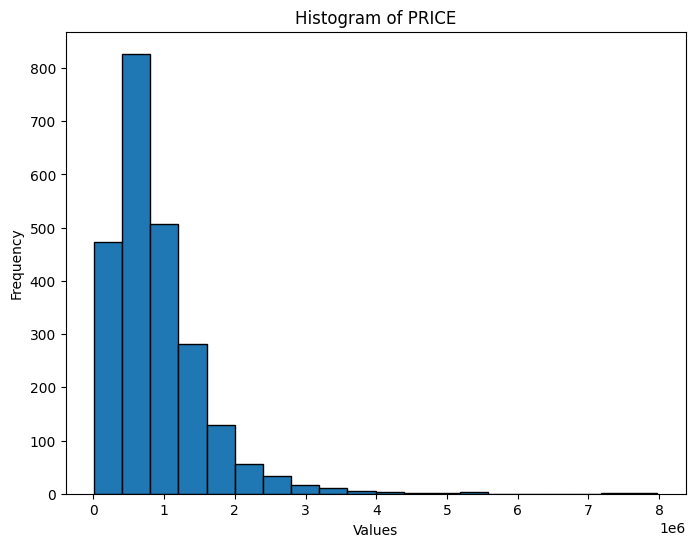

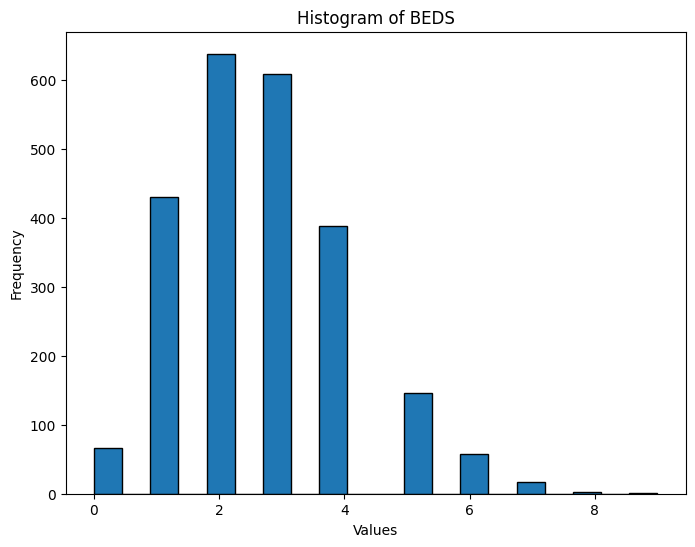

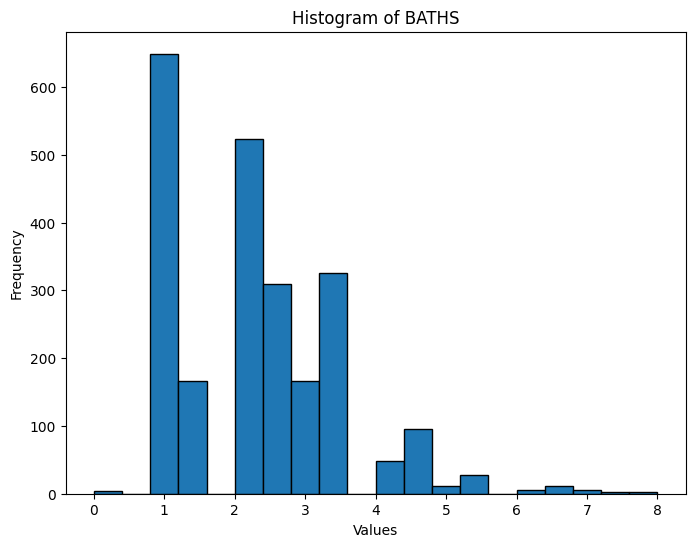

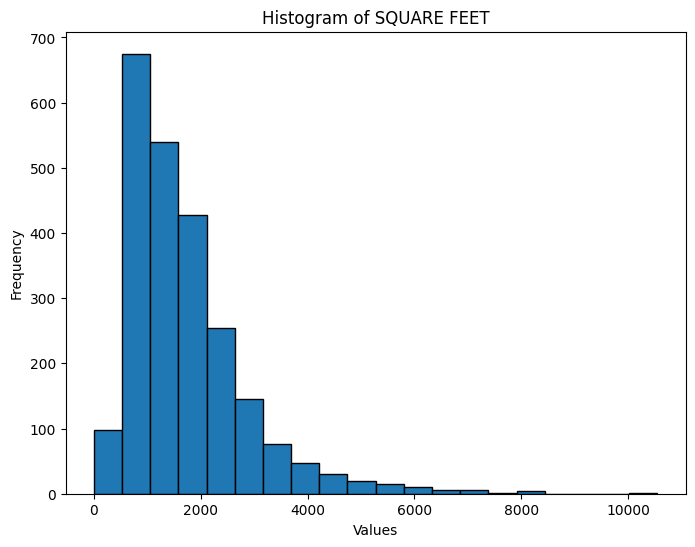

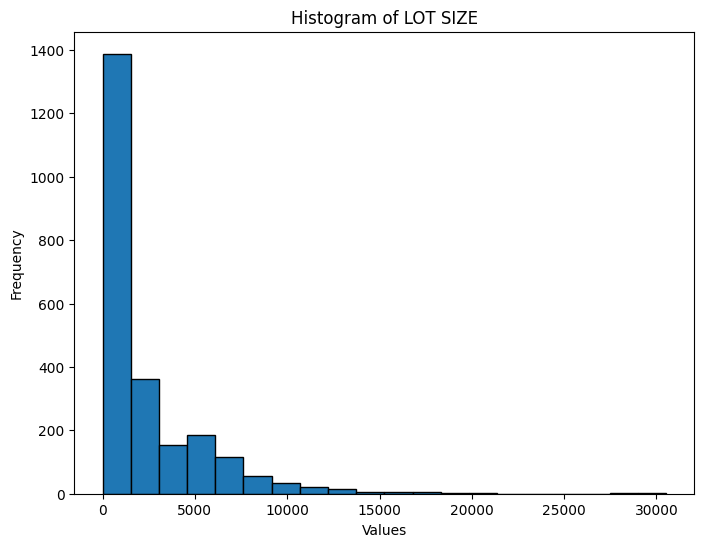

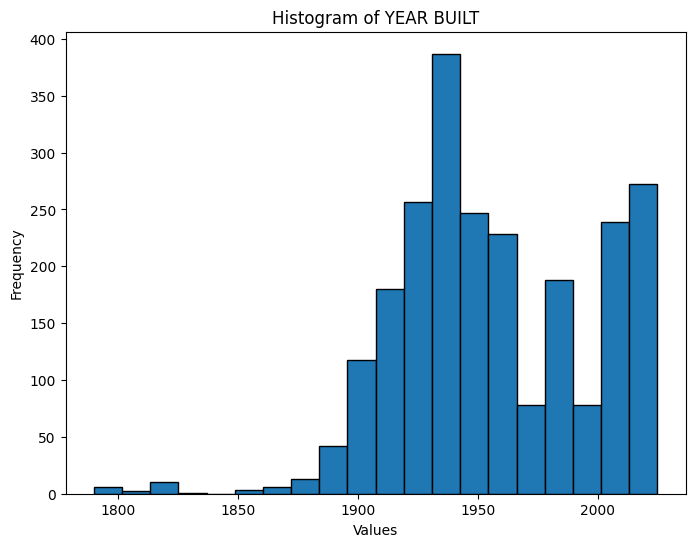

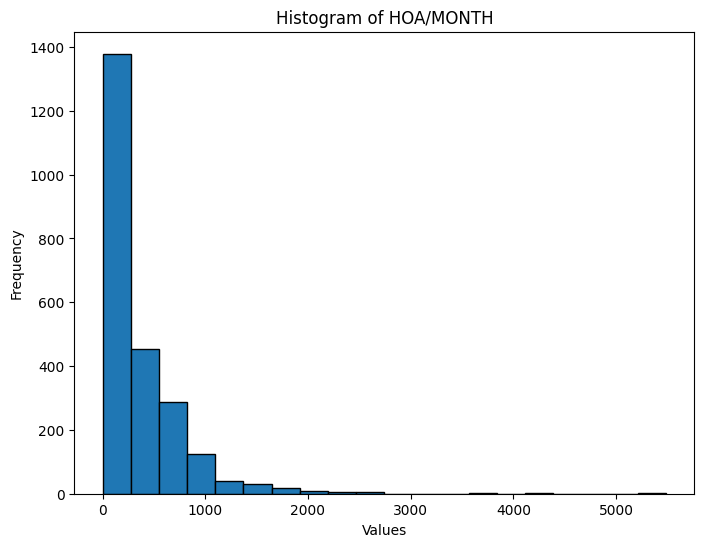

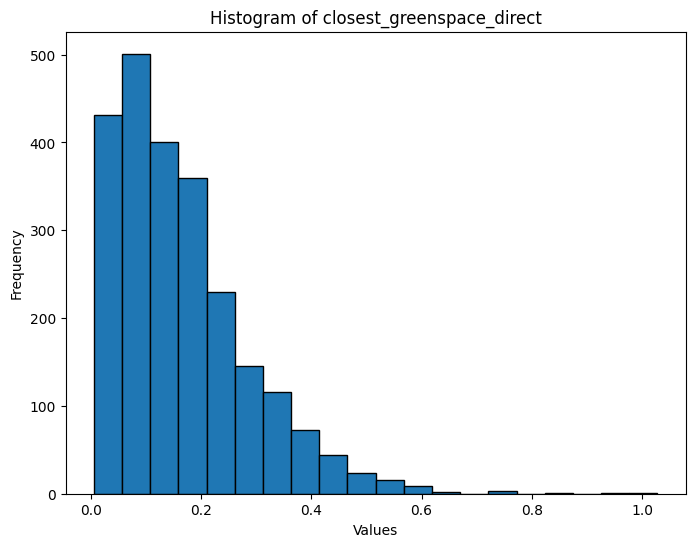

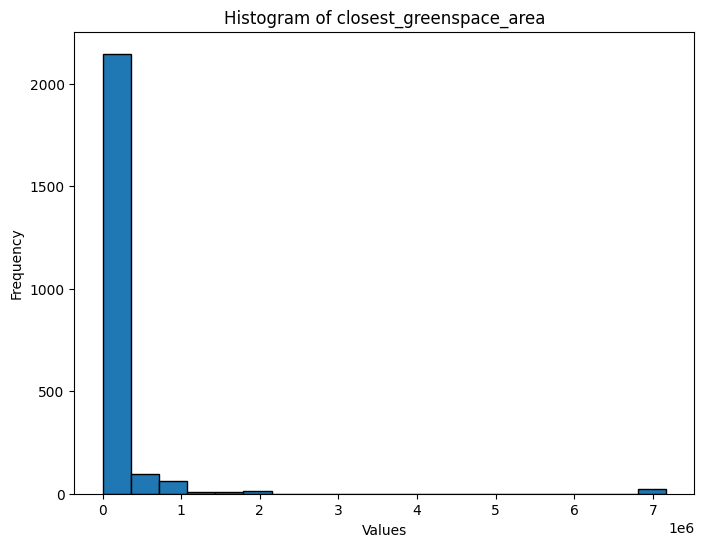

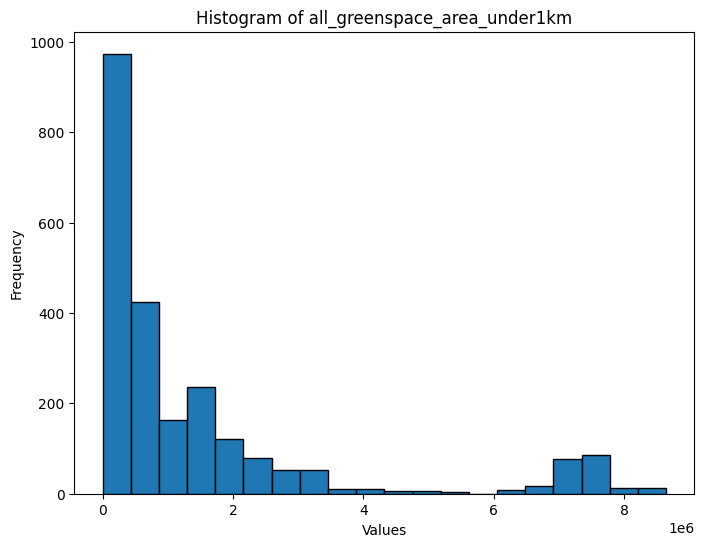

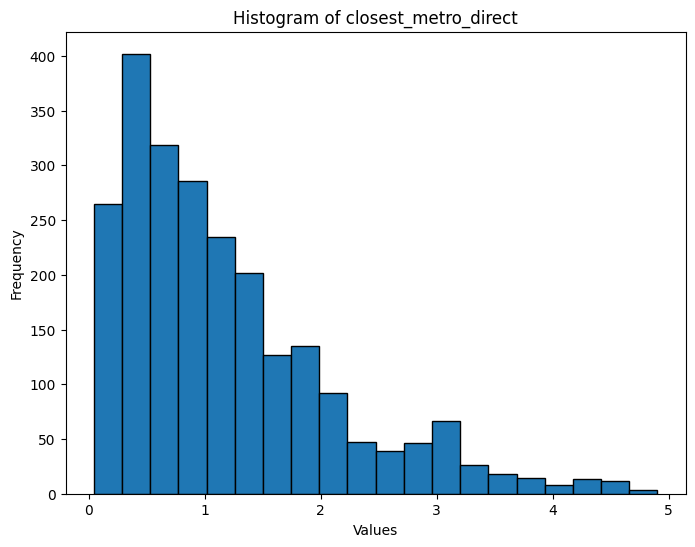

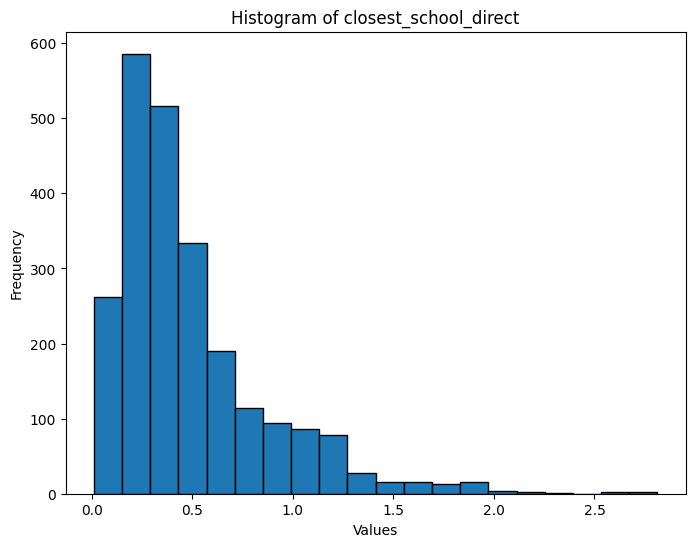

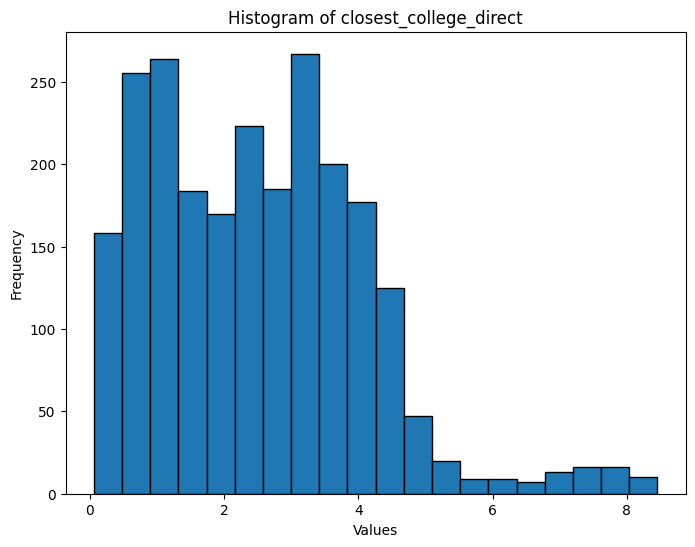

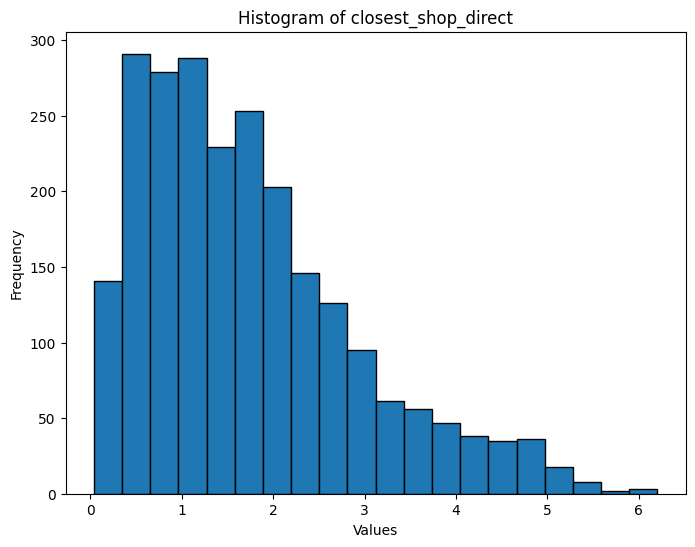

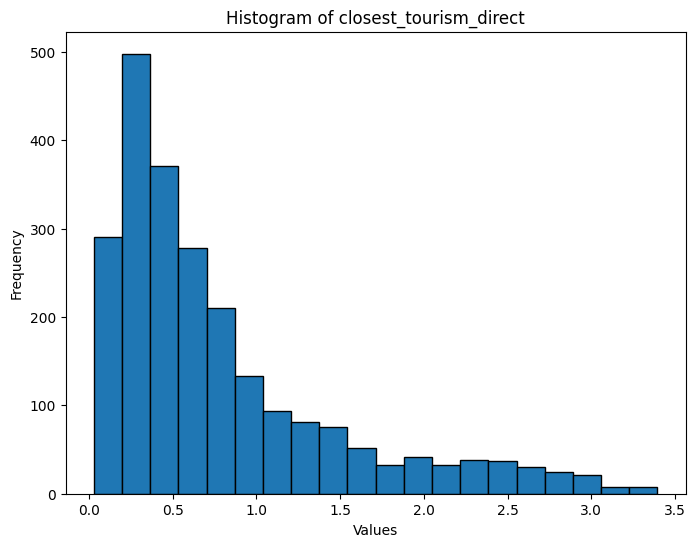

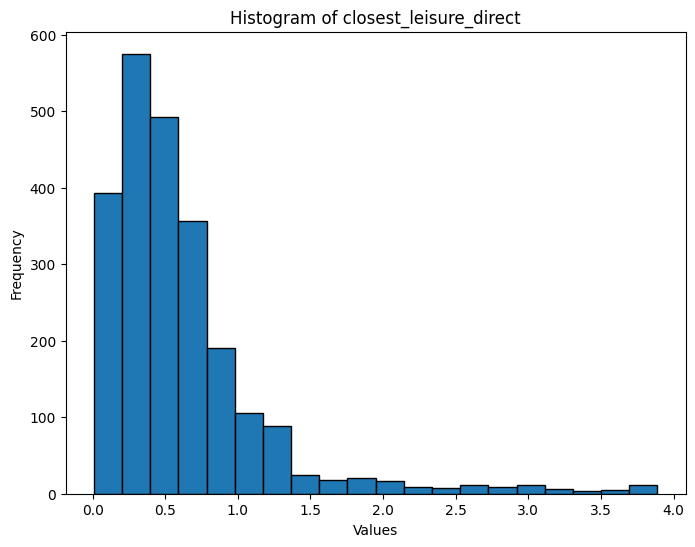

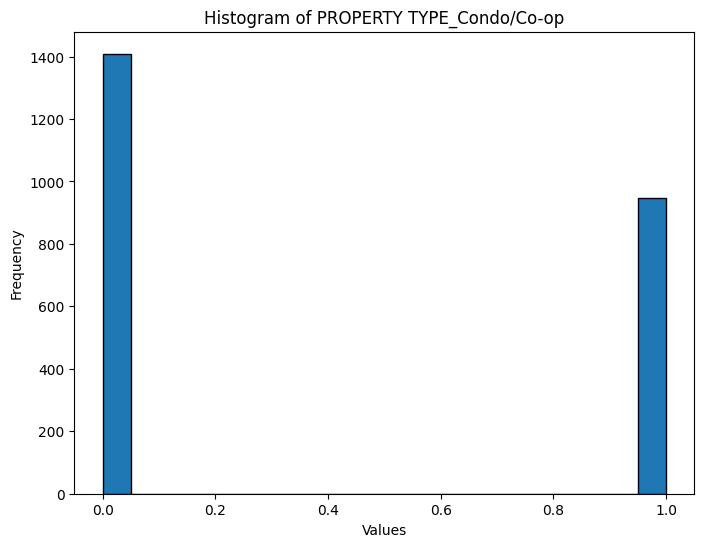

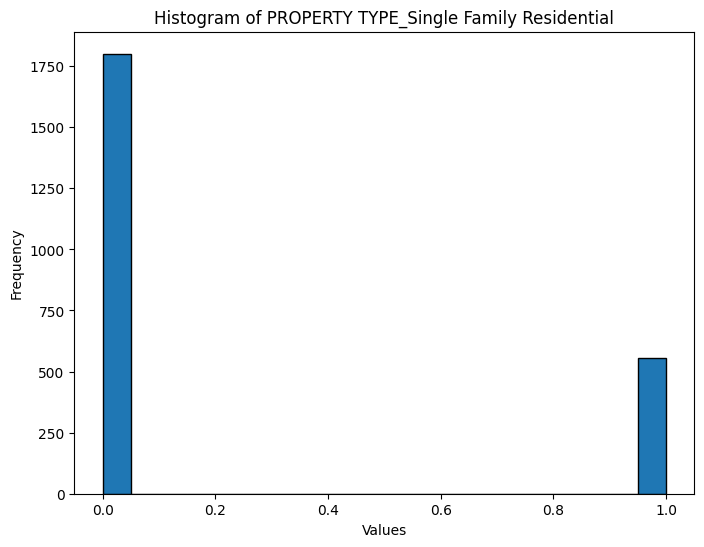

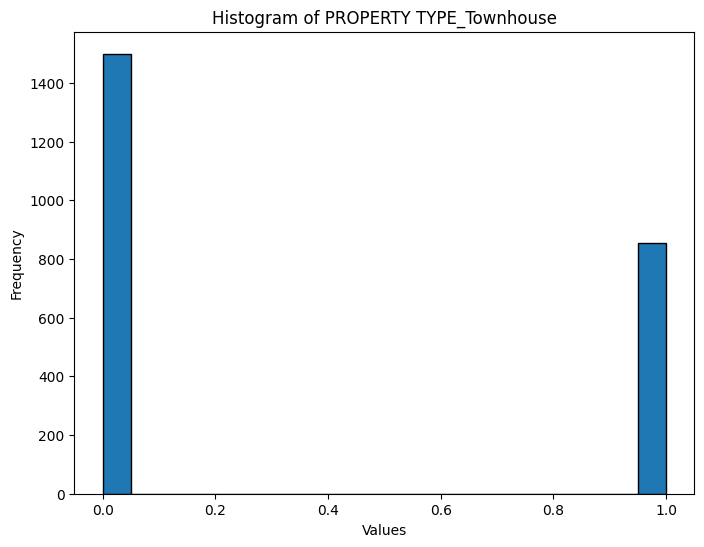

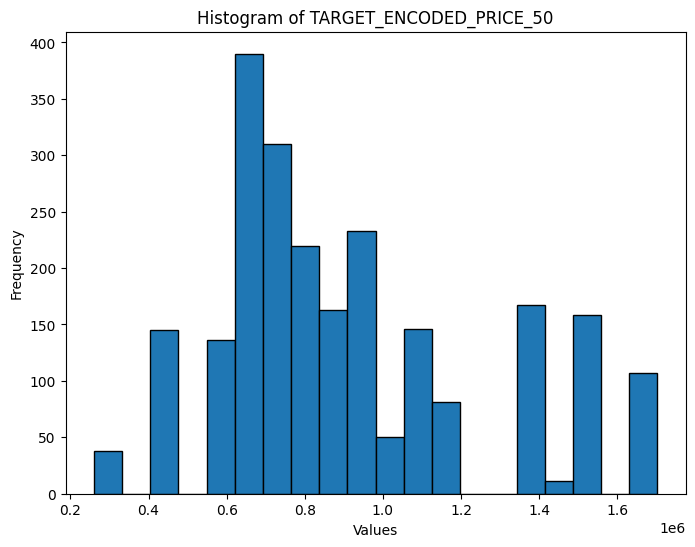

In [ ]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

Check distributions of new variables before scaling, but robust scaler seems like a good bet for this project

In [ ]:
X = df.drop(columns = ['PRICE'])
y = df['PRICE']

In [ ]:
exclude_columns = ['PROPERTY TYPE_Condo/Co-op', 'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'] #careful, this assumes any new column we add should be thrown into robust scaler (probably is the case)
all_columns = X.columns
robust_columns = [col for col in all_columns if col not in exclude_columns]
scaler = RobustScaler()
X[robust_columns] = scaler.fit_transform(X[robust_columns])

In [ ]:
X

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,closest_greenspace_direct,closest_greenspace_area,all_greenspace_area_under1km,closest_metro_direct,closest_school_direct,closest_college_direct,closest_shop_direct,closest_tourism_direct,closest_leisure_direct,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,TARGET_ENCODED_PRICE_50
0,-1.0,-0.50,-0.588422,-0.295707,0.894309,0.777887,-0.104595,-0.113846,-0.323523,-0.674282,-0.323775,-0.920720,-0.733634,-0.473984,-0.279108,1,0,0,-0.046582
1,0.0,0.50,1.881047,5.244515,-0.211382,-0.252715,0.995694,-0.188058,-0.402506,1.499079,-0.487916,0.057349,0.878506,-0.563408,0.688123,0,1,0,1.914340
2,-1.0,-0.50,-0.575734,-0.295707,0.569106,0.550839,-0.628295,-0.113846,-0.345430,-0.746807,-0.162873,-0.839519,-0.703273,-0.219374,-0.490691,1,0,0,-0.046582
3,-1.0,-0.50,-0.545599,-0.295707,0.861789,0.574531,-0.015684,-0.189965,-0.244409,-0.616239,-0.351915,-0.967580,-0.837310,-0.545406,-0.382092,1,0,0,-0.340945
4,1.0,1.25,3.373513,1.830207,0.926829,-0.252715,-0.710027,0.223247,-0.204976,0.973555,1.199862,-0.117602,0.553111,0.914063,0.229584,0,1,0,1.914340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,0.0,0.00,0.081681,0.648649,-0.032520,-0.252715,0.808122,-0.186287,-0.143861,0.272664,0.195602,0.674314,1.178047,0.223868,0.784152,0,0,1,-0.345508
2423,0.0,0.25,0.333862,0.455008,0.016260,-0.252715,0.747437,13.609475,-0.143861,0.365203,0.424019,0.688158,1.162123,0.196866,0.868776,0,0,1,-0.345508
2425,0.0,0.75,0.152260,0.379968,0.000000,-0.252715,0.514874,13.609475,-0.143861,0.274231,0.278377,0.695812,1.215542,0.302261,0.891847,0,0,1,-0.345508
2426,0.0,0.25,0.554322,0.944356,-0.032520,-0.252715,-0.306058,0.068592,-0.016089,0.618277,-0.694937,0.690986,0.884455,0.301166,1.044413,0,1,0,-0.345508


Model Selection:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, #decrease n_iter to speed up proccess
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'subsample': 0.8, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [ ]:
xgb_model = random_search.best_estimator_

In [ ]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.83924973 0.85180665 0.85212985 0.85767252 0.89085922]
0.8583435929985207


Select best model based on folds, now evaluate on test data

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_}) #might need to replace
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

R-squared (R2): 0.8591933476134633
Mean Squared Error (MSE): 64043741096.709946
Feature Importances:
                                    Feature  Importance
2                               SQUARE FEET    0.363617
1                                     BATHS    0.192129
18                  TARGET_ENCODED_PRICE_50    0.110545
11                   closest_college_direct    0.045262
3                                  LOT SIZE    0.042890
10                    closest_school_direct    0.033187
5                                 HOA/MONTH    0.025342
13                   closest_tourism_direct    0.024771
8              all_greenspace_area_under1km    0.024692
4                                YEAR BUILT    0.023287
12                      closest_shop_direct    0.022405
14                   closest_leisure_direct    0.021322
6                 closest_greenspace_direct    0.013468
17                  PROPERTY TYPE_Townhouse    0.012275
0                                      BEDS    0.010418
16 

Save training data, XGB model, and original X (for scaling)

In [ ]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
X_train.to_csv('X_train.csv')
files.download('X_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [ ]:
files.download('xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)
files.download('y_train.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_raw = X.copy() #Ideally we would do this right when X is created so we dont have to inverse transform. Try to do this next time
X_raw[robust_columns] = scaler.inverse_transform(X[robust_columns])

In [ ]:
X_raw

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,closest_greenspace_direct,closest_greenspace_area,all_greenspace_area_under1km,closest_metro_direct,closest_school_direct,closest_college_direct,closest_shop_direct,closest_tourism_direct,closest_leisure_direct,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,TARGET_ENCODED_PRICE_50
0,1.0,1.0,698.0,0.0,2005.0,5.220000e+02,0.122773,2778.829717,218198.510995,0.177483,0.253084,0.230396,0.367360,0.199054,0.339469,1,0,0,7.929219e+05
1,3.0,3.0,3812.0,17424.0,1937.0,1.421085e-14,0.290724,305.313007,105694.014358,2.634139,0.190914,2.584436,2.850123,0.133246,0.800917,0,1,0,1.535608e+06
2,1.0,1.0,714.0,0.0,1985.0,4.070000e+02,0.042834,2778.829717,186993.310039,0.095504,0.314028,0.425833,0.414117,0.386427,0.238526,1,0,0,7.929219e+05
3,1.0,1.0,752.0,0.0,2003.0,4.190000e+02,0.136345,241.772309,330891.596563,0.243092,0.242426,0.117612,0.207693,0.146494,0.290337,1,0,0,6.814341e+05
4,5.0,4.5,5694.0,6686.0,2007.0,1.421085e-14,0.030358,14014.192197,387061.107021,2.040113,0.830182,2.163361,2.349002,1.220543,0.582156,0,1,0,1.535608e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,3.0,2.0,1543.0,2970.0,1948.0,1.421085e-14,0.262093,364.358400,474113.695365,1.247862,0.449805,4.069364,3.311430,0.712616,0.846730,0,0,1,6.797057e+05
2423,3.0,2.5,1861.0,2361.0,1951.0,1.421085e-14,0.252830,460179.863106,474113.695365,1.352463,0.536321,4.102684,3.286907,0.692744,0.887103,0,0,1,6.797057e+05
2425,3.0,3.5,1632.0,2125.0,1950.0,1.421085e-14,0.217331,460179.863106,474113.695365,1.249634,0.481157,4.121104,3.369174,0.770307,0.898110,0,0,1,6.797057e+05
2426,3.0,2.5,2139.0,3900.0,1948.0,1.421085e-14,0.092021,8859.530138,656116.422721,1.638526,0.112502,4.109491,2.859285,0.769501,0.970896,0,1,0,6.797057e+05


In [ ]:
X_raw.to_csv('X_raw.csv')
files.download('X_raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>